In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"
%load_ext autoreload
%autoreload 2
from haloclustering.models import Model
from haloclustering.data import get_combined_dataset, make_grid_data
import haloclustering.evalulate_model as evaluate
import numpy as np
import matplotlib.pyplot as plt
import corner

plt.rcParams['font.serif'] = "DejaVu Serif"
plt.rcParams['font.family'] = "serif"

plt.rcParams['mathtext.fontset']='stix'
plt.rcParams['font.size'] = 16

### load in combined CGM$^2$ + CASBaH

In [2]:
cgmsqfile = "/Users/mwilde/python/cgm-squared/cgmsquared/data/cgm/cgmsquared_cgmsurvey_aodm_vhalos10_3sigma.json"
casdir = "/Users/mwilde/Dropbox/CASBaH/data/h1_galaxies_20Mpc_500kms_*.fits"
data = get_combined_dataset(cgmsqfile, casdir)

read_sets: Using set file -- 
  /Users/mwilde/python/linetools/linetools/lists/sets/llist_v1.3.ascii
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Cutting on redshift in hits/misses
Cutting on impact parameter in hits/misses
hits 1389
misses 5509
Cutting on redshift in hits/misses
Cutting on impact parameter in hits/misses
hits 268
misses 291


In [3]:
import glob
glob.glob("/Users/mwilde/Dropbox/CASBaH/data/h1_galaxies_20Mpc_500kms_*.fits")

['/Users/mwilde/Dropbox/CASBaH/data/h1_galaxies_20Mpc_500kms_fb0751.fits',
 '/Users/mwilde/Dropbox/CASBaH/data/h1_galaxies_20Mpc_500kms_pg1148.fits',
 '/Users/mwilde/Dropbox/CASBaH/data/h1_galaxies_20Mpc_500kms_pg1630.fits',
 '/Users/mwilde/Dropbox/CASBaH/data/h1_galaxies_20Mpc_500kms_pg1407.fits',
 '/Users/mwilde/Dropbox/CASBaH/data/h1_galaxies_20Mpc_500kms_phl1377.fits',
 '/Users/mwilde/Dropbox/CASBaH/data/h1_galaxies_20Mpc_500kms_pg1206.fits']

In [5]:
from astropy.table import Table
Table.read('/Users/mwilde/Dropbox/CASBaH/data/h1_galaxies_20Mpc_500kms_fb0751.fits')

cgm_name,z_1,rho_impact,ion,flag_N,logN,sig_logN [2],vmin,vmax,id,z_2,ra,dec,mstars,mstars_err,mhalo,rvir,mhalo_single,rvir_single,sfr_bayes,sfr_err_bayes,chi2_sed,sfh_age_sed,sfh_sfr_sed
,,,,,,,,,,,,,solMass,solMass,,,,,solMass / yr,solMass / yr,,Myr,solMass / yr
bytes19,float64,float64,bytes2,int64,float64,float64,float64,float64,bytes19,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
J0751+2919_225_19,0.5212332010269165,124.08269526164943,HI,1,14.489782802061713,0.06731281874299722 .. 0.06731281874299722,-170.06091360317518,153.17575956582232,J075111.26+291924.5,0.521233201027,117.79691666666665,29.32347222222222,10.01244805917493,0.3029825244133662,11.713441951196794,164.80095012999521,11.70326787494477,163.51904891992248,0.06949630414887085,0.03744193771962967,7.116699059221607,8000.0,0.07676783570895612
J0751+2919_335_20,0.2885,91.53831833075525,HI,1,14.109436511927932,0.016764260327332334 .. 0.016764260327332334,-145.86062947969293,127.23937052038815,J075111.64+291956.8,0.2885,117.79849999999998,29.332444444444445,7.392574673227418,0.920173566671174,10.380595731402167,69.95020803082015,10.382522980514569,70.05375622906517,0.005848884356610622,0.007112905059770355,2.492532612021683,2000.0,0.002907622602551835
J0751+2919_117_21,0.1463,55.21935417913668,HI,1,14.283718290572745,0.01733648457030908 .. 0.01733648457030908,-150.14780674428235,126.16697908060404,J075113.73+291928.8,0.1463,117.8072083333333,29.324666666666666,6.473334792759386,1.4266846337977113,9.948042375110841,56.41449291271952,9.948772899610237,56.446133291055155,0.00013460886606679162,0.000458233691115957,3.6820433175575733,2000.0,1.7905148851198056e-14
J0751+2919_29_23,0.6693,163.2377650746745,HI,1,13.494716360858774,0.11025317308900678 .. 0.11025317308900678,159.13217358804394,469.56826982421694,J075113.15+291958,0.6693,117.80479166666665,29.33277777777778,8.258366529243713,0.5284044386209892,10.841467632052204,76.90649285587477,10.844986113033013,77.11446213863464,0.0967615781932226,0.05506547085386036,2.453109252734465,2000.0,0.07059417202239437
J0751+2919_124_25,0.6156,173.63652697496718,HI,1,14.075811423671905,0.07684121189518721 .. 0.07684121189518721,-88.68072265642644,311.3192773435654,J075113.88+291924.2,0.6156,117.80783333333332,29.32338888888889,8.992605720619745,1.2495126520407378,11.196003532433492,104.31390153859549,11.201875146652949,104.7850666304872,5.138708558514223e-06,2.5392500950597244e-05,4.605091609624097,2000.0,4.1692286744085246e-07
J0751+2919_60_29,0.6973,211.39169048834134,HI,1,14.025565622034131,0.04901636147089648 .. 0.04901636147089648,-75.57295519030637,319.8799132315269,J075114.22+291952.5,0.6973,117.80924999999998,29.33125,8.572657021933983,1.2617330399174078,11.000108989791025,85.43173798461683,11.004517138500125,85.72127547859839,0.005059363315007387,0.012372808768553789,1.6135816896455148,2000.0,0.036380746065414
J0751+2919_183_39,0.4939,241.9243624209047,HI,1,15.537637652388911,0.020193318173899657 .. 0.020193318173899657,-118.86153957078643,211.90623490532977,J075112.15+291859.6,0.4939,117.80062499999998,29.316555555555556,8.888584719969659,1.1686272314578245,11.121357979490654,106.53017866747396,11.127743377118538,107.05356177754197,0.009202691412688957,0.010336433070899502,5.513513077647711,8000.0,0.02916150105959496
J0751+2919_234_39,0.372,208.66966684381921,HI,1,13.628175405205141,0.038573367078718425 .. 0.038573367078718425,-307.68901250974625,59.37012059663262,J075109.88+291914.9,0.372,117.79116666666665,29.320805555555555,7.59318944144947,0.48959306049157203,10.48549389510317,71.20088249356002,10.487744072906375,71.3239580280165,0.02250251804668787,0.012628791779660784,1.9988824025238972,2000.0,0.03561217811181707


In [3]:
# r0, gamma, r0_2, gamma_2, beta1, beta2, beta2h, dndz_index, dndz_coeff = params

r_0 = 3 # clustering scale
r_0_2 = 4
beta_1_initial = 0.5
beta_2h_initial = 0.05
gamma_initial = 6 # clutering powerlaw index
gamma_2_initial = 1.6
dndz_index = 1.2 # dN/dz powerlaw index
dndz_coeff = 27
initial = np.array([r_0, gamma_initial, r_0_2, gamma_2_initial, beta_1_initial, beta_2h_initial, dndz_index, dndz_coeff])
bounds = ((0, 10), (1, 10), (0, 10), (1, 5), (-3, 3), (-3, 3), (-3, 3), (0, 35))

In [4]:
model = Model(data, m0=10**9.5)

In [5]:
soln = evaluate.max_likelihood_est(model, initial, bounds)
r0, gamma, r0_2, gamma_2, beta1, beta2h, dndz_index, dndz_coeff = soln.x

print('\n')
print("Maximum likelihood estimates:")
print("=============================")
print("r0 = {0:.3f}".format(r0))
print("r0_2 = {0:.3f}".format(r0_2))
print("gamma = {0:.3f}".format(gamma))
print("gamma_2 = {0:.3f}".format(gamma_2))
print("beta1 = {0:.3f}".format(beta1))
print("beta2h = {0:.3f}".format(beta2h))
print('dndz_index = {0:.3f}'.format(dndz_index))
print('dndz_index = {0:.3f}'.format(dndz_coeff))
print("=============================")

/Users/mwilde/python/cgm-squared/cgmsquared/clustering2.py:188: RuntimeWarning: divide by zero encountered in true_divide
  (x * (np.sqrt(r ** 2 + x ** 2) / r0) ** (-g))




Maximum likelihood estimates:
r0 = 1.461
r0_2 = 7.832
gamma = 2.520
gamma_2 = 1.000
beta1 = 0.171
beta2h = -0.009
dndz_index = 1.299
dndz_index = 16.844


In [6]:

# sampler = evaluate.posterior_sampler(soln, model.log_probability, nsteps=4000)

In [7]:
# r0, gamma, r0_2, gamma_2, beta1, beta2h, dndz_index, dndz_coef
bounds = np.array([[0, 1, 2, 1, -1, -1, 0, 10], 
                    [2, 5, 6, 3, 1, 1, 2, 30]])

sampler = evaluate.posterior_sampler_uniform_start(bounds, model.log_probability, nsteps=4000)

  0%|          | 0/4000 [00:00<?, ?it/s]/Users/mwilde/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 4000/4000 [10:26<00:00,  6.38it/s]   


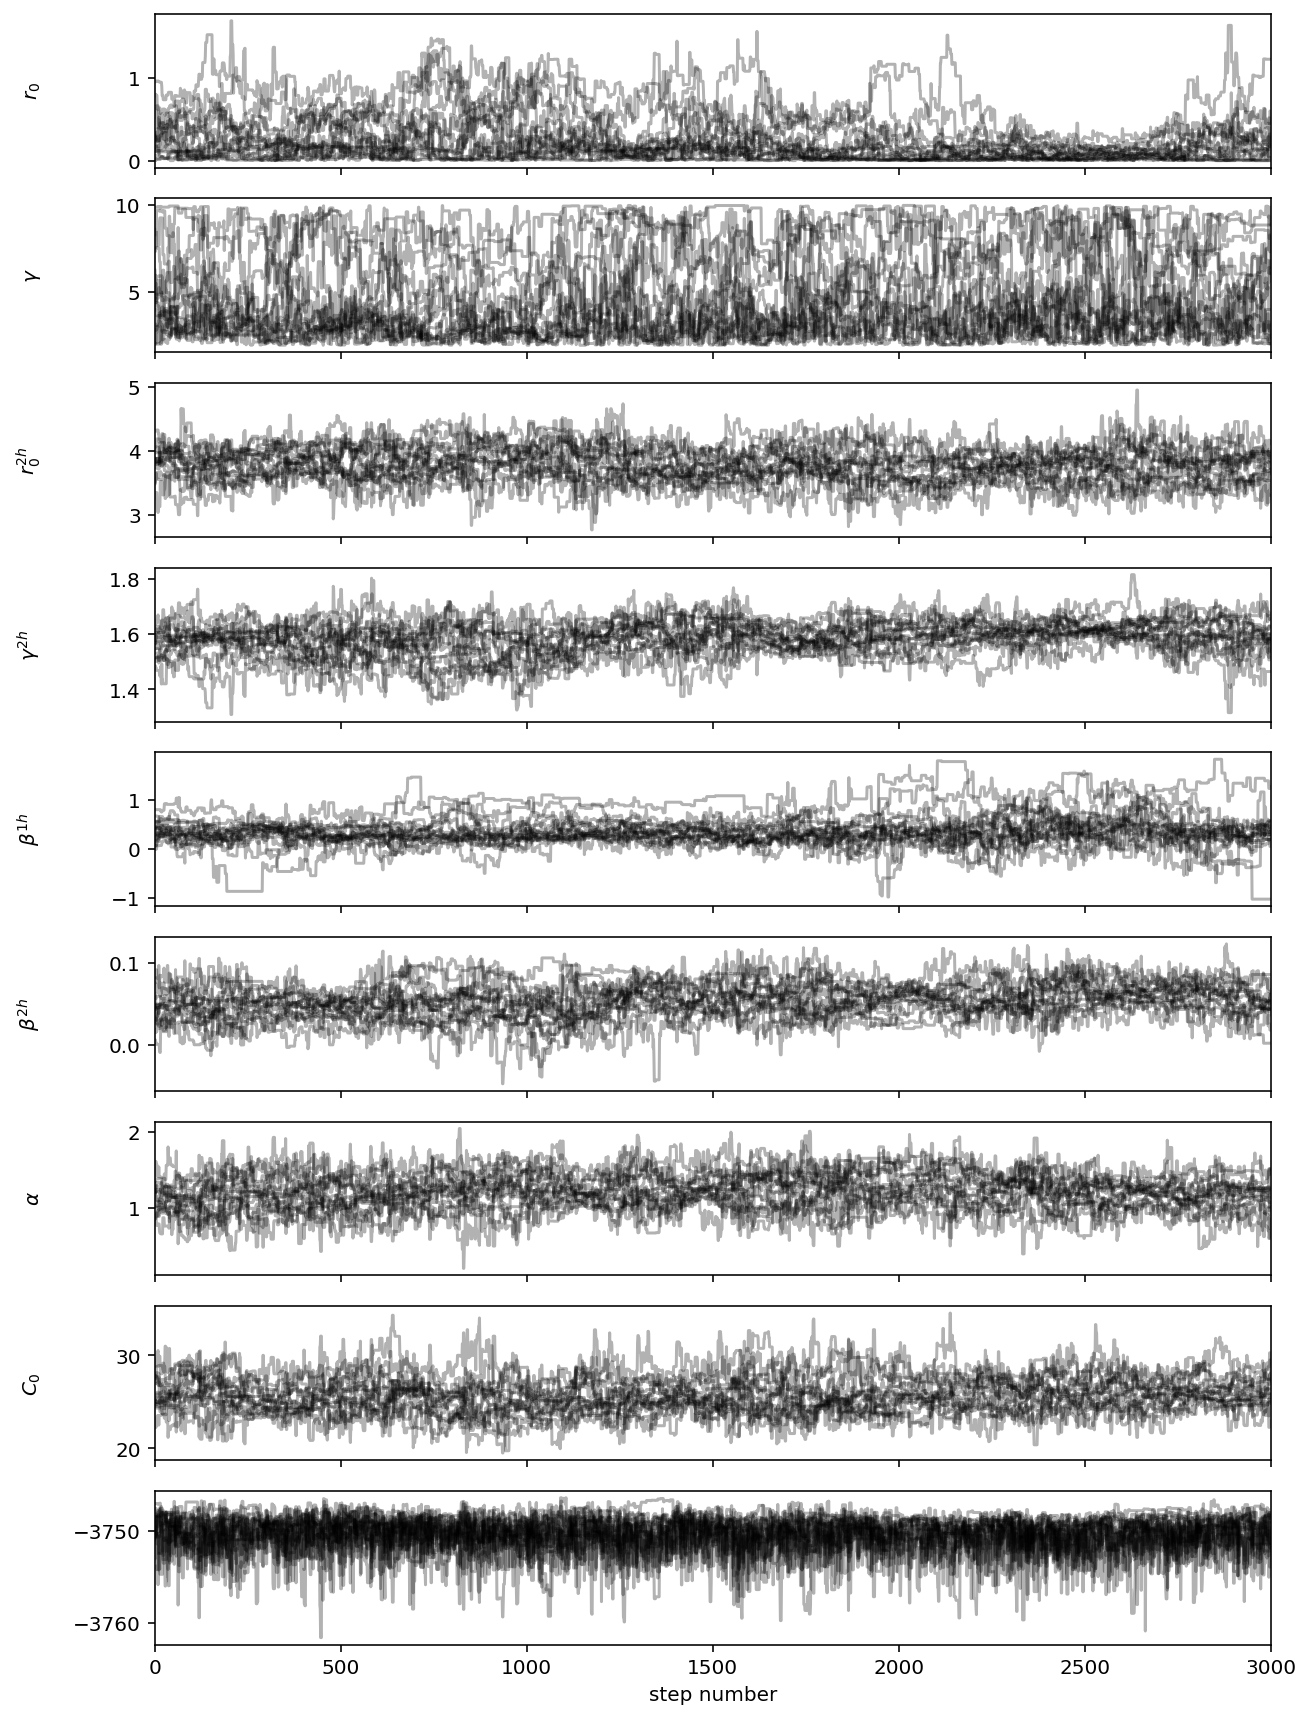

In [8]:
discard = 1000
samples = sampler.get_chain(discard=discard)
flat_samples = sampler.get_chain(discard=discard, thin=1, flat=True)

ndim = samples.shape[2]

# plot
# r0, gamma, r0_2, gamma_2, beta1, beta2, beta2h, dndz_index, dndz_coeff
fig, axes = plt.subplots(nrows=ndim+1, figsize=(10, 15), sharex=True)
labels = [r"$r_{0}$", r"$\gamma$", r"$r_0^{2h}$", r"$\gamma^{2h}$", r"$\beta^{1h}$", r"$\beta^{2h}$", r"$\alpha$", r'$C_0$']
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number")

axes[-1].plot(sampler.lnprobability.T[discard:], "k", alpha=0.3);

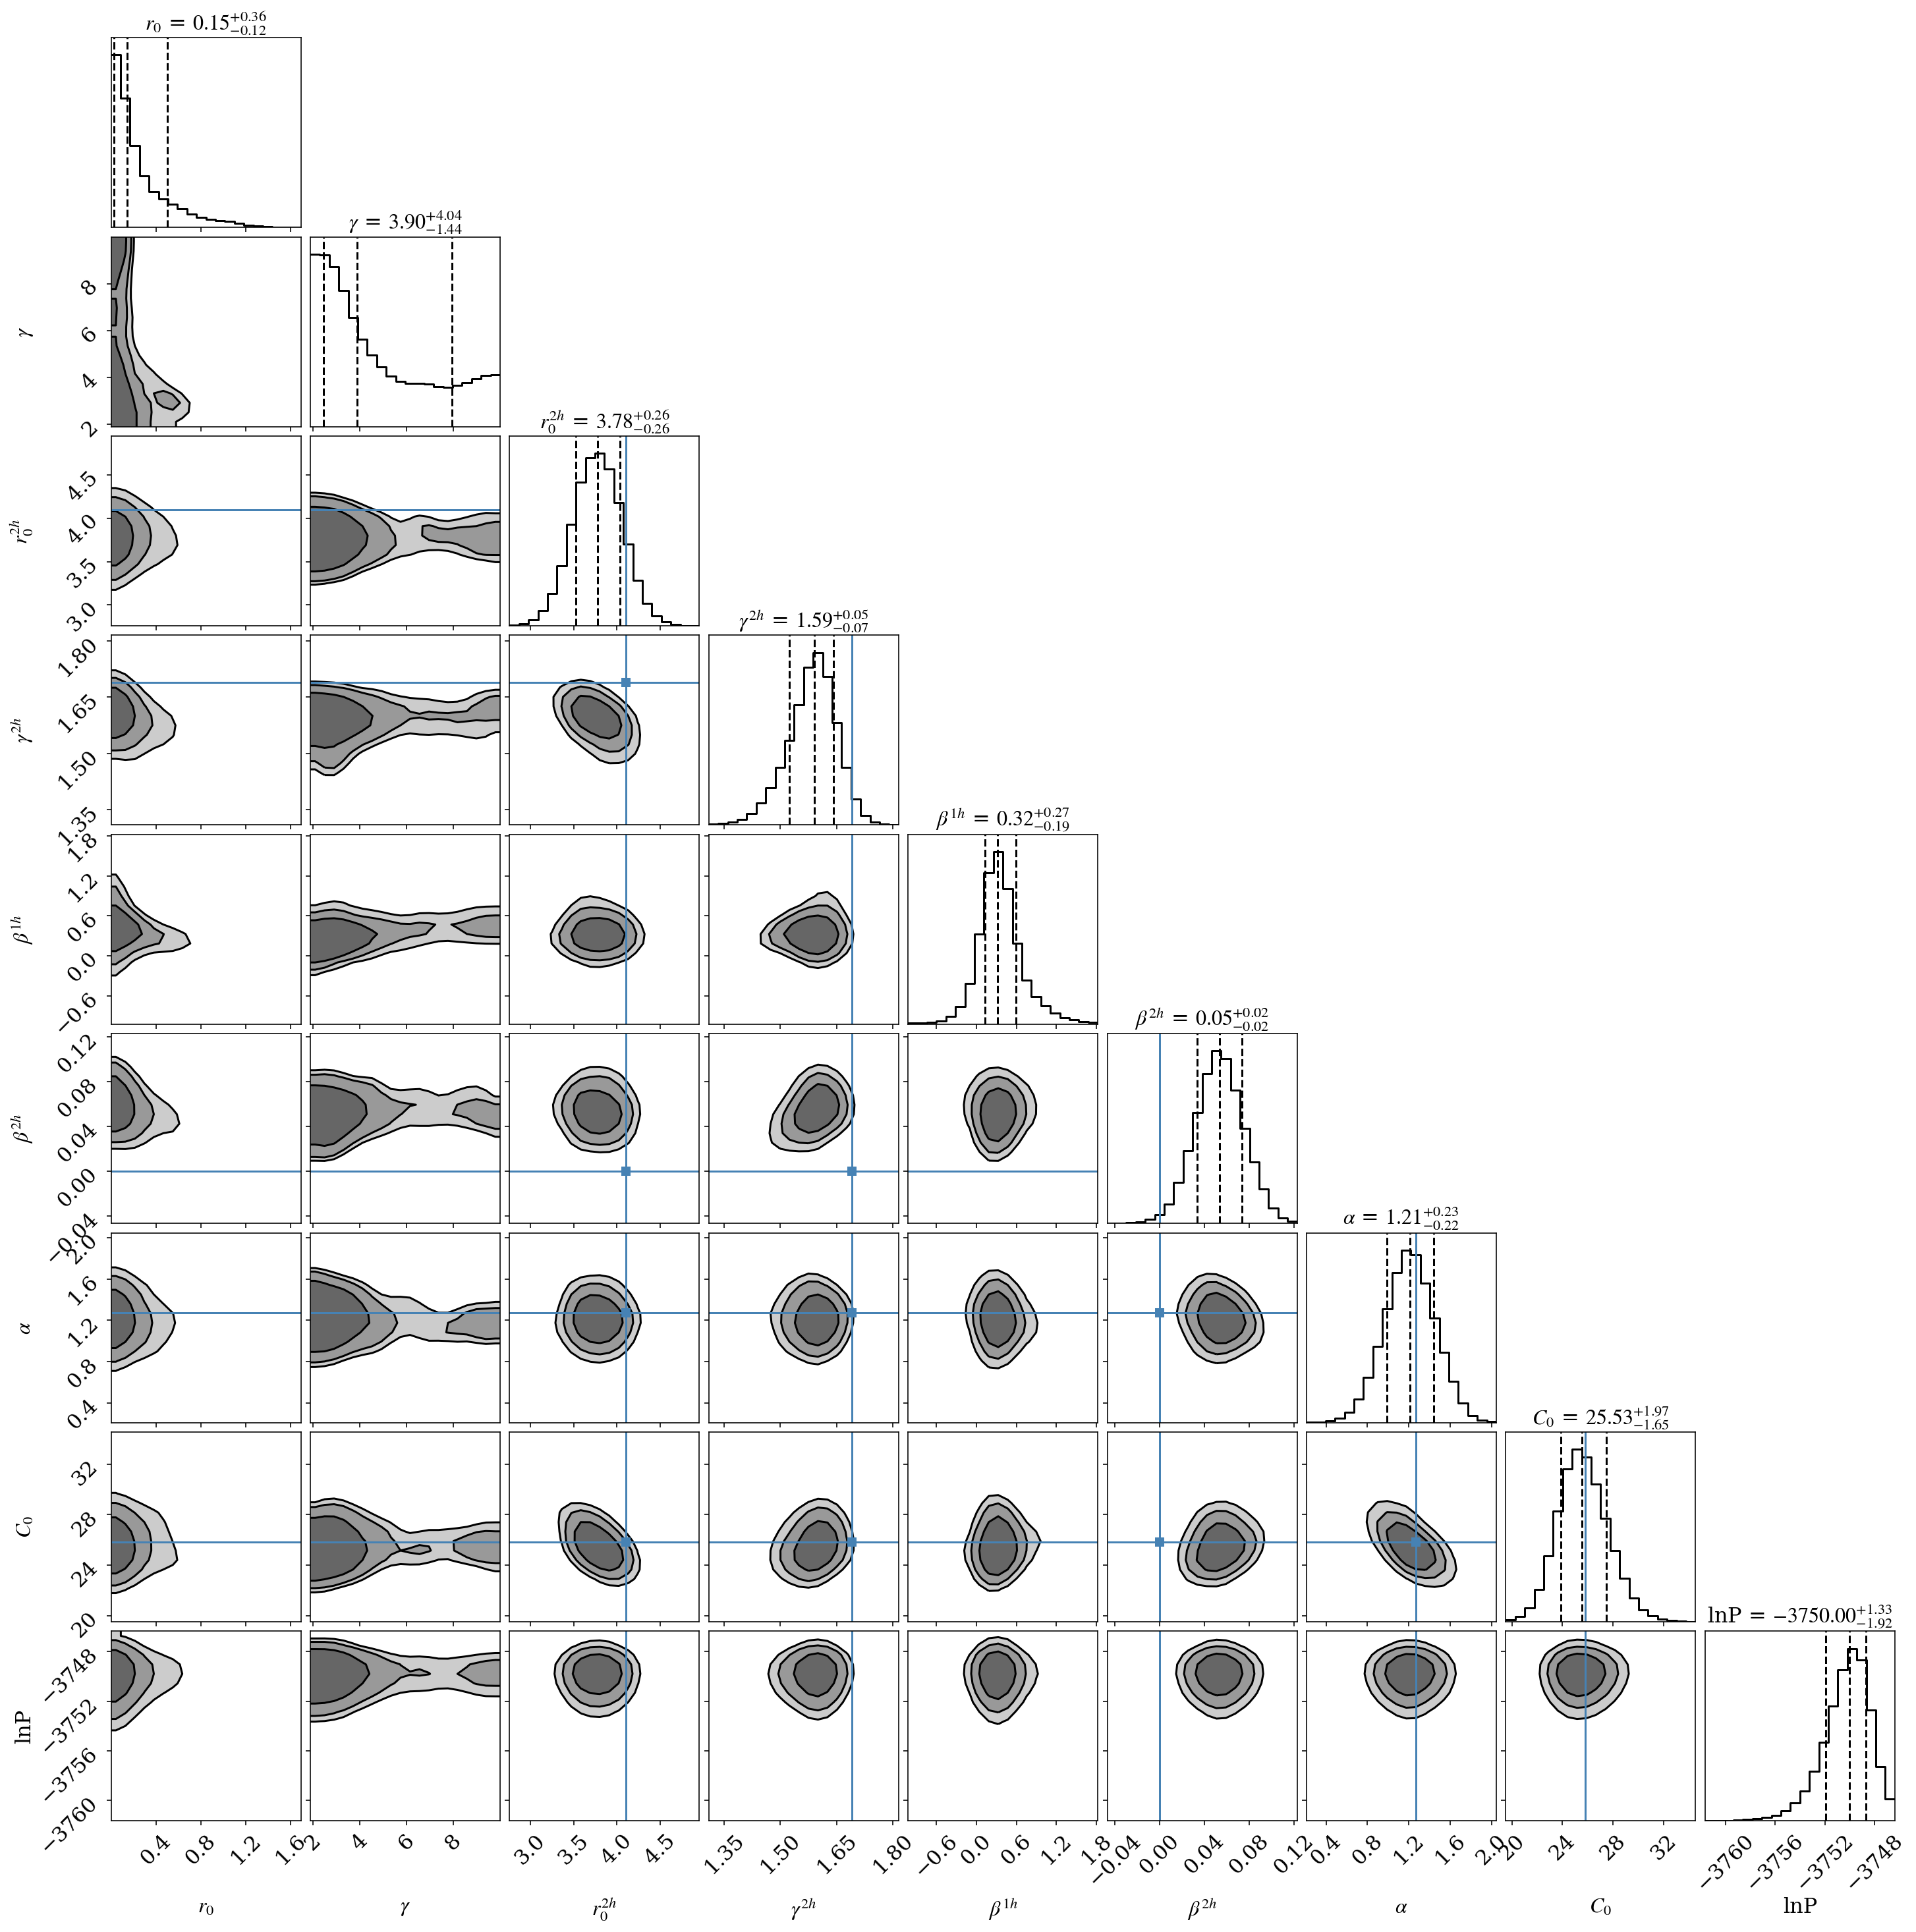

In [40]:
lnprob = sampler.lnprobability[:,discard:].ravel()
flt_w_likelihood = np.concatenate([flat_samples, lnprob[:, None]], axis=1)
nolo_gamma_mask = flt_w_likelihood[:,1] > 1.9

levels = (0, 1-np.exp(-0.5), 1-np.exp(-1), 1-np.exp(-1.5))
new_flat = flt_w_likelihood[nolo_gamma_mask]
fig = corner.corner(
    new_flat, labels=labels+['lnP'], levels=levels, quantiles=[0.16, 0.5, 0.84], show_titles=True, title_kwargs={"fontsize": 16}, 
    truths=[None, None, 4.1, 1.69, None, 0, 1.27, 25.8, None], smooth=1, smooth1d=1, labelpad=0.1, plot_datapoints=False, plot_density=False,
    fill_contours=True
);
fig.savefig("corner_base_model.png")



In [10]:
import pickle
# save the sampler    
with open("model_1beta_mass_dependence_sampler.pkl", "wb") as f:
    pickle.dump(sampler, f)

### look at the betas as a quick check as to how they follow rvir

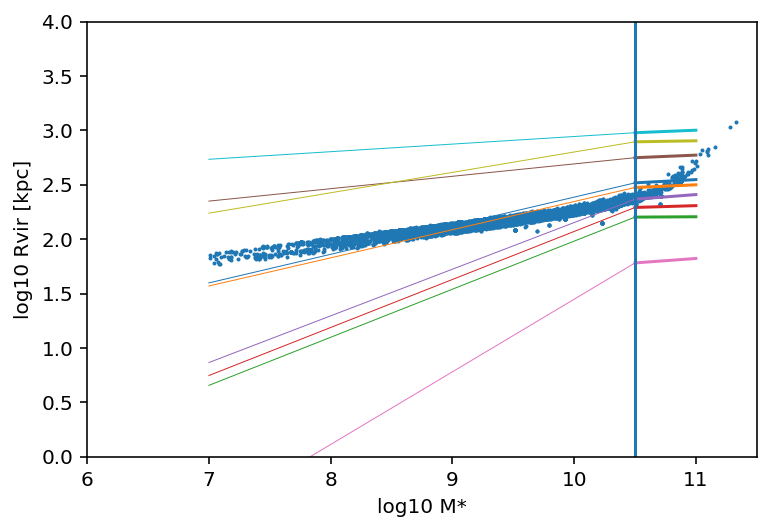

In [11]:
plt.scatter(np.log10(data[2]), np.log10(data[7]),s=1)
mline_lo = np.logspace(7,10.5)
mline_hi = np.logspace(10.5,11)

def rline(r0, beta, mline):
    m0 = 10**10.5
    return np.log10(r0*(mline/m0)**beta) + 3

asample = new_flat[:10].T
r0sample = asample[0]
beta1sample = asample[4]
beta2sample = asample[5]
plt.plot(np.log10(mline_lo), rline(r0sample, beta1sample, mline_lo[:, None]), lw=0.5)
plt.plot(np.log10(mline_hi), rline(r0sample, beta2sample, mline_hi[:, None]))

plt.axvline(10.5)
plt.xlabel("log10 M*")
plt.ylabel("log10 Rvir [kpc]")
plt.xlim(6, 11.5)
plt.ylim(0,4);

### examine the covering fraction, $f_c# profile 

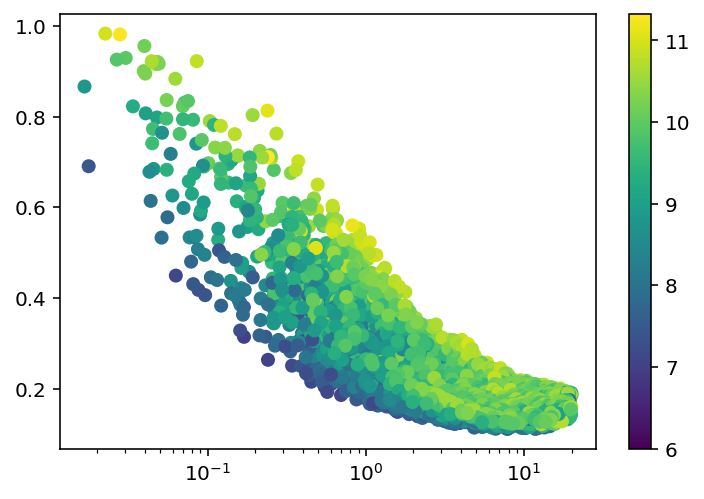

In [12]:
model.set_params(new_flat[20, :-1])

phit1h = model.phit_1halo()
phit2h = model.phit_2halo()



rho_lin = np.linspace(0, 10, len(model.rho_com))

# plt.scatter(model.rho_com, phit1h, c=np.log10(model.mass), vmin=6)
plt.scatter(model.rho_com, phit2h, c=np.log10(model.mass), vmin=6)
plt.colorbar()
plt.xscale('log')
# plt.yscale('log')


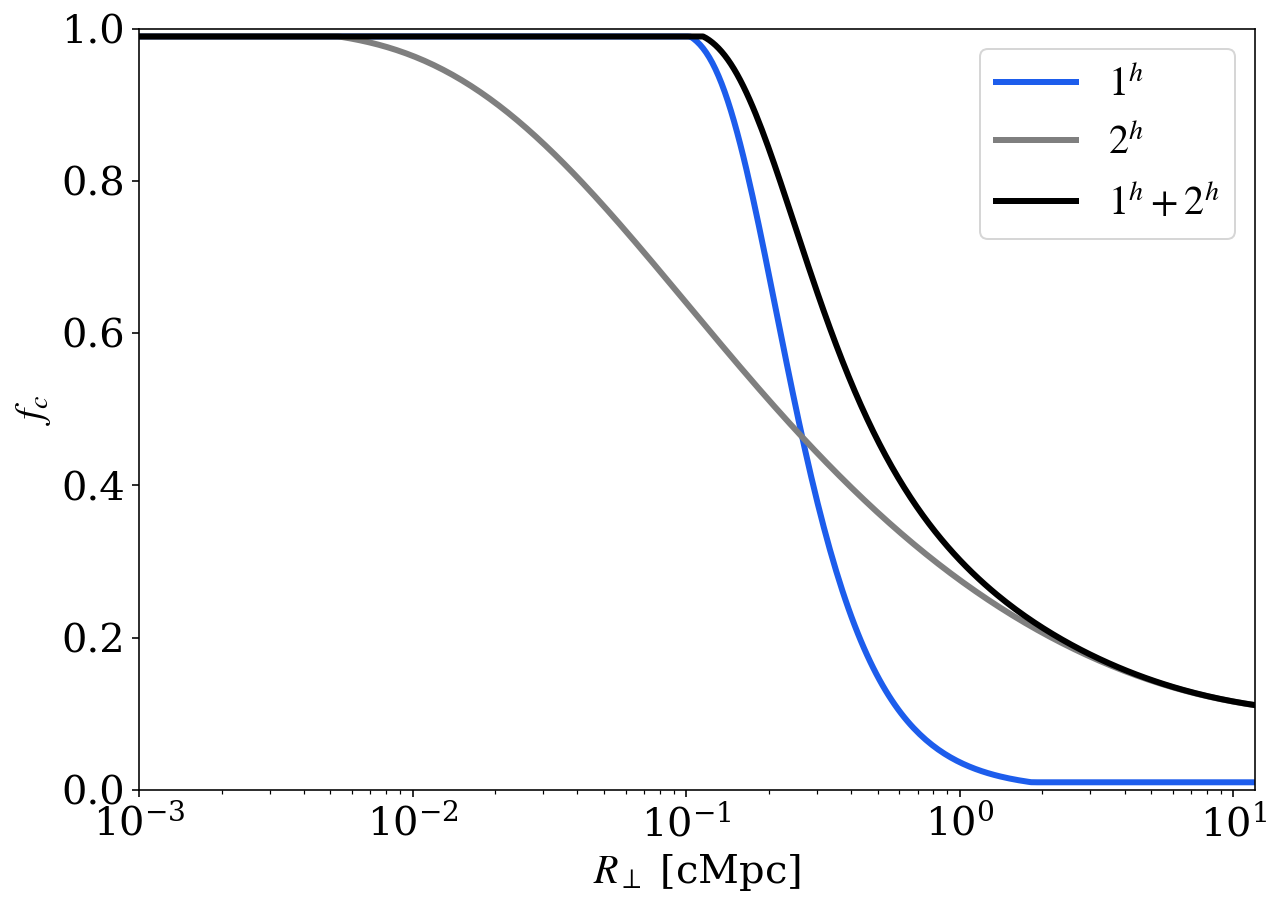

In [13]:
import matplotlib
plt.rcParams['mathtext.fontset']='stix'

# matplotlib.rcParams['font.sans-serif'] = "Times"
# matplotlib.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = 20

matplotlib.rcParams['font.serif'] = "DejaVu Serif"
matplotlib.rcParams['font.family'] = "serif"

plt.rcParams['mathtext.fontset']='stix'
plt.rcParams['font.size'] = 20

plt.figure(figsize=(10,7))
log = True

params = np.quantile(flat_samples, 0.5, axis=0)
params = new_flat[1420, :-1]
#params_low = np.quantile(flat_samples, 0.16, axis=0)
#params_hi = np.quantile(flat_samples, 0.84, axis=0)
theta = params

# these come from > 1 Mpc cgm3_check_dndz.ipynb
# twoh_params = [3.76863494,  1.60368843,  0.03840335,  1.25840737, 25.58740086]

toydata = make_grid_data(10.5, 0.1)
toymodel = Model(data=toydata)
toymodel.set_params(params)
fc_1h = toymodel.phit_1halo()
fc_2h = toymodel.phit_2halo()
fc_total = toymodel.phit_sum()

r_lin = toymodel.data[1]

plt.plot(r_lin, fc_1h, label=r'$1^{h}$', c='xkcd:azul', lw=3)
plt.plot(r_lin, fc_2h, label=r'$2^{h}$', c='tab:grey', lw=3)
plt.plot(r_lin, fc_total, label=r'$1^{h} + 2^{h}$', c='black', lw=3)
# plt.plot(r_lin, fc_2h_only, label='2_halo_only', c='black', ls='--', lw=3)
# plt.axvline(rcgm, lw=3, ls='--')
plt.ylim(0, 1)
# plt.xlim(0, 12)
if log:
    plt.xscale('log')
    #plt.yscale('log')
    plt.xlim(1e-3, 12)
    #plt.ylim(-2, 1)
plt.ylabel(r"$f_c$")
plt.xlabel(r"$R_{\perp}$ [cMpc]")
plt.legend();
